Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 42564745.67it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 4183440.18it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 13550076.70it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 1172773.26it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



torch.Size([100, 1, 28, 28]) torch.Size([100])
epoch 1 / 2, step 100 / 600, loss = 0.4907
epoch 1 / 2, step 200 / 600, loss = 0.3699
epoch 1 / 2, step 300 / 600, loss = 0.2221
epoch 1 / 2, step 400 / 600, loss = 0.2716
epoch 1 / 2, step 500 / 600, loss = 0.3789
epoch 1 / 2, step 600 / 600, loss = 0.2622
epoch 2 / 2, step 100 / 600, loss = 0.2404
epoch 2 / 2, step 200 / 600, loss = 0.3168
epoch 2 / 2, step 300 / 600, loss = 0.2428
epoch 2 / 2, step 400 / 600, loss = 0.2125
epoch 2 / 2, step 500 / 600, loss = 0.1675
epoch 2 / 2, step 600 / 600, loss = 0.1680
accuracy = 95.35


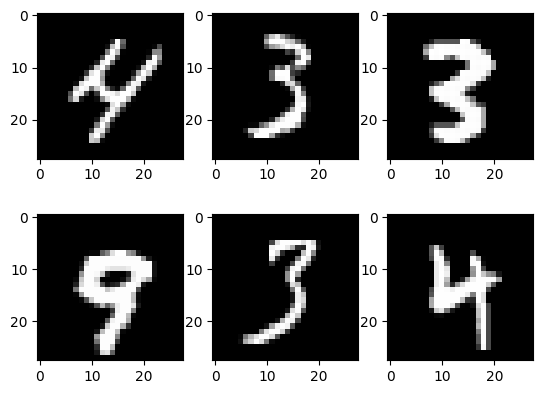

In [1]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
input_size = 784 #28x28
hidden_size = 100
num_classes = 10
num_epochs = 2
batch_size = 100
learning_rate = 0.001

# MNIST
train_dataset = torchvision.datasets.MNIST(root="./data", train=True, transform=transforms.ToTensor(), download=True)
test_dataset = torchvision.datasets.MNIST(root="./data", train=False, transform=transforms.ToTensor())

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

examples = iter(train_loader)
samples, labels = next(examples)
print(samples.shape, labels.shape)

for i in range(6):
  plt.subplot(2, 3, i + 1)
  plt.imshow(samples[i][0], cmap="gray")

class NeuralNetwork(nn.Module):
  def __init__(self, input_size, hidden_size, num_classes):
    super(NeuralNetwork, self).__init__()
    self.l1 = nn.Linear(input_size, hidden_size)
    self.relu = nn.ReLU()
    self.l2 = nn.Linear(hidden_size, num_classes)

  def forward(self, x):
    out = self.l1(x)
    out = self.relu(out)
    out = self.l2(out)
    return out

model = NeuralNetwork(input_size, hidden_size, num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

#training loop
n_total_steps = len(train_loader)
for epoch in range(num_epochs):
  for i, (images, labels) in enumerate(train_loader):
    images = images.reshape(-1, 28 * 28).to(device)
    labels = labels.to(device)
    #forwards
    outputs = model(images)
    loss = criterion(outputs, labels)
    #backwards
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if (i + 1) % 100 == 0:
      print(f"epoch {epoch + 1} / {num_epochs}, step {i + 1} / {n_total_steps}, loss = {loss.item():.4f}")
#test
with torch.no_grad():
  n_correct = 0
  n_samples = 0
  for images, labels in test_loader:
    images = images.reshape(-1, 28 * 28).to(device)
    labels = labels.to(device)
    outputs = model(images)
    #value, index
    _, predictions = torch.max(outputs, 1)
    n_samples += labels.shape[0]
    n_correct += (predictions == labels).sum().item()

  acc = 100.0 * n_correct / n_samples
  print(f"accuracy = {acc}")
